# Project: Wrangling and Analyze Data

During this project, I work on the resources made available to me by UDACITY since I could not have the API of Tweeter for the extraction of data

## Table of Contents

<li><a href="#gather">Data Gathering</a>
</li>

<li><a href="#assess">Assessing Data</a>
    <ul>
        <li><a href="#dataset_1">1. DataSet : df_dog_ratings</a></li>
        <li><a href="#dataset_2">2. DataSet : df_tweets</a></li>
        <li><a href="#dataset_3">3. DataSet : df_image_pred</a></li>
    </ul>
</li>

<li><a href="#quality_tidiness">Quality & Tidiness issues</a>
</li>

<li><a href="#cleaning">Cleaning Data</a>
    <ul>
        <li><a href="#issue_1">Issue #1: The "timestamp" column type</a></li>
        <li><a href="#issue_2">Issue #2: Missing value</a></li>
        <li><a href="#issue_3">Issue #3: remove words and types</a></li>
        <li><a href="#issue_4">Issue #4: cleaning HTML anotations</a></li>
		<li><a href="#issue_5">Issue #5: remove words</a></li>
        <li><a href="#issue_6">Issue #6: filtering values</a></li>
        <li><a href="#issue_7">Issue #7: consistency 1 - Lowercases</a></li>
        <li><a href="#issue_8">Issue #8: consistency 2 - underscores</a></li>
		<li><a href="#t_issue_1">Tidiness issue #1:</a></li>
        <li><a href="#t_issue_2">Tidiness issue #2:</a></li>
        <li><a href="#t_issue_3">Tidiness issue #3:</a></li>
    </ul>
</li>

<li><a href="#storing">Storing Data</a>
    <ul>
        <li><a href="#add_clean">Additionnal Cleanning</a></li>
        <li><a href="#saving">Saving data</a></li>
    </ul>
</li>

<li><a href="#analyzing_viz">Analyzing and Visualizing Data</a>
    <ul>
        <li><a href="#insights">Insights:</a></li>
			<ul>
				<li><a href="#ins_1">Insight #1:</a></li>
				<li><a href="#ins_2">Insight #2:</a></li>
        		<li><a href="#ins_3">Insight #3:</a></li>
			</ul>
        <li><a href="#viz">Visualization</a></li>
    </ul>
</li>

<a id='gather'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import json
import io
import re
import requests
import tweepy
from tweepy import OAuthHandler
import seaborn as sns

In [2]:
df_dog_ratings = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
data_r = requests.get(link).content
type(data_r)

bytes

let's directly read as a table the image-predictions file manually downloaded before

In [4]:
df_image_pred = pd.read_table('image-predictions.tsv')

In [5]:
df_image_pred.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
## Let's create dictionnary of elements we have to extract from the tweet 
# (ID, Retweet_count, favorite_count,retweeted, created_at)
tweet_dvar = {'id':[],
              'created_at':[],
             'retweet_count':[],
             'favorite_count':[],
             'retweeted':[],}
var_list = ['id','created_at','retweet_count','favorite_count','retweeted']

Defining some functions to help extraction and all treatment processes process on the txt files downloaded.

In [7]:
def clean_id(data):
    rgex = re.compile('[^0-9]')
    data = rgex.sub('', data)
    data = data.strip()
    if data:
        data = int(data)
        
    return data

In [8]:
def extract_val(record, val):
    start_ix = record.find(val)
    end_ix = record.find(',', start_ix)
    data = record[start_ix:end_ix]
    
    if val not in ['created_at','retweeted']:
        data = clean_id(data)
        
    return data

Faisons maintenant l'extraction et completons les valeurs dans le dictionnaire créé plus haut.

In [9]:
with open('tweet-json.txt', 'r', encoding = 'utf8') as file:
    json_tweets =  file.readlines()
    for t in range(len(json_tweets)):            
        line = json_tweets[t]
        for v in range (len(var_list)):
            tweet_dvar[var_list[v]].append(extract_val(line, var_list[v]))


In [10]:
df_tweets = pd.DataFrame(tweet_dvar)
df_tweets.shape

(2354, 5)

In [11]:
# visualise some
df_tweets.head()

id                                     created_at  \
0  892420643555336193  created_at": "Tue Aug 01 16:23:56 +0000 2017"   
1  892177421306343426  created_at": "Tue Aug 01 00:17:27 +0000 2017"   
2  891815181378084864  created_at": "Mon Jul 31 00:18:03 +0000 2017"   
3  891689557279858688  created_at": "Sun Jul 30 15:58:51 +0000 2017"   
4  891327558926688256  created_at": "Sat Jul 29 16:00:24 +0000 2017"   

   retweet_count  favorite_count          retweeted  
0           8853           39467  retweeted": false  
1           6514           33819  retweeted": false  
2           4328           25461  retweeted": false  
3           8964           42908  retweeted": false  
4           9774           41048  retweeted": false

As we can see, we have our dataframe made from our dictionnary

<a id='assess'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

* J'effectuerai une évaluation visuelle non directive pour la seule raison que je ne connais pas encore particulièrement les tables à inspecter
* Cette évaluation visuelle me permettra de verifier la qualité et l'ordre (proprété) des données et sera faite sur **Google Sheet**


### Programmatic Assessment

* J'effectuerai une évaluation programmatic non directive pour la seule raison que je ne connais pas encore particulièrement les tables à inspecter
* Cette évaluation visuelle me permettra de verifier la qualité et l'ordre (proprété) des données et sera faite dans **Pandas**

<a id='dataset_1'></a>
#### 1. DataSet : df_dog_ratings

#### Visual Assessment of df_dog_ratings

*  Ce dataset est la sous-collection de données de l'archive tweeter : twitter-archive-enhanced.csv

In [12]:
## Save the file as CSV file to have a better format for visualisation on GSheet
df_dog_ratings.to_csv('df_dog_ratings.csv', index=False)

The file below is a GSheet for visual assessement of df_dog_ratings

https://docs.google.com/spreadsheets/d/15j0_4EDA4FpEc688M8RF8SOLgq1onQAE1Eb1cs45Dkg/edit#gid=1182530626

**Quality issues:**
   1. The time_stamp column is a string type instead of datetime object
   2. Missing value: We can see several missing values in columns
   3. The **source** column comes with HTML anotations 

**Tidiness issues:**
   1. All dog types (doggo,floofer,pupper,puppo) can be represented by one column called **type_of_dog**
   2. This two columns (rating_numerator and rating_denominator) can be one column 

#### Programmatic Assessment of df_dog_ratings

*  Ce dataset est la sous-collection de données de l'archive tweeter : twitter-archive-enhanced.csv
*  Let's do programmatic assessment

In [13]:
df_dog_ratings.shape

(2356, 17)

In [14]:
# Looking at some observations
df_dog_ratings.sample(40, random_state=15)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1941  673715861853720576                    NaN                  NaN   
1282  708738143638450176                    NaN                  NaN   
709   785170936622350336                    NaN                  NaN   
2073  670995969505435648                    NaN                  NaN   
714   784057939640352768                    NaN                  NaN   
45    883482846933004288                    NaN                  NaN   
620   796125600683540480                    NaN                  NaN   
1823  676533798876651520                    NaN                  NaN   
673   789628658055020548                    NaN                  NaN   
1394  700002074055016451                    NaN                  NaN   
2231  668226093875376128                    NaN                  NaN   
679   789137962068021249                    NaN                  NaN   
954   751793661361422336                    NaN                  NaN   
56    881536004380872706                    NaN                  NaN   
2100  670704688707301377                    NaN                  NaN   
1169  720785406564900865                    NaN                  NaN   
2181  668994913074286592                    NaN                  NaN   
2180  669000397445533696                    NaN                  NaN   
1106  734787690684657664                    NaN                  NaN   
901   758474966123810816                    NaN                  NaN   
1926  674053186244734976                    NaN                  NaN   
1073  739932936087216128                    NaN                  NaN   
787   774639387460112384                    NaN                  NaN   
2068  671138694582165504                    NaN                  NaN   
591   799063482566066176                    NaN                  NaN   
1759  678740035362037760                    NaN                  NaN   
1554  688898160958271489                    NaN                  NaN   
1724  680085611152338944                    NaN                  NaN   
2221  668480044826800133                    NaN                  NaN   
2270  667502640335572993                    NaN                  NaN   
2194  668892474547511297                    NaN                  NaN   
1614  685307451701334016                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
524   809220051211603969                    NaN                  NaN   
825   769695466921623552                    NaN                  NaN   
1277  709042156699303936                    NaN                  NaN   
2257  667728196545200128                    NaN                  NaN   
1341  704847917308362754                    NaN                  NaN   
1517  690938899477221376                    NaN                  NaN   
1775  678021115718029313                    NaN                  NaN   

                      timestamp  \
1941  2015-12-07 04:09:13 +0000   
1282  2016-03-12 19:35:15 +0000   
709   2016-10-09 17:31:53 +0000   
2073  2015-11-29 16:01:20 +0000   
714   2016-10-06 15:49:14 +0000   
45    2017-07-08 00:28:19 +0000   
620   2016-11-08 23:01:49 +0000   
1823  2015-12-14 22:46:41 +0000   
673   2016-10-22 00:45:17 +0000   
1394  2016-02-17 17:01:14 +0000   
2231  2015-11-22 00:34:50 +0000   
679   2016-10-20 16:15:26 +0000   
954   2016-07-09 15:02:31 +0000   
56    2017-07-02 15:32:16 +0000   
2100  2015-11-28 20:43:53 +0000   
1169  2016-04-15 01:26:47 +0000   
2181  2015-11-24 03:29:51 +0000   
2180  2015-11-24 03:51:38 +0000   
1106  2016-05-23 16:46:51 +0000   
901   2016-07-28 01:31:38 +0000   
1926  2015-12-08 02:29:37 +0000   
1073  2016-06-06 21:32:13 +0000   
787   2016-09-10 16:03:16 +0000   
2068  2015-11-30 01:28:28 +0000   
591   2016-11-17 01:35:54 +0000   
1759  2015-12-21 00:53:29 +0000   
1554  2016-01-18 01:38:15 +0000   
1724  2015-12-24 18:00:19 +0000   
2221  2015-11-22 17:23:57 +0000   
2270  2015-11

In [15]:
# Looking at some observations
df_dog_ratings.sample(40, random_state=20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
950   752173152931807232                    NaN                  NaN   
933   753655901052166144                    NaN                  NaN   
2243  667902449697558528                    NaN                  NaN   
1595  686358356425093120                    NaN                  NaN   
909   757725642876129280                    NaN                  NaN   
1324  706169069255446529                    NaN                  NaN   
1614  685307451701334016                    NaN                  NaN   
1461  694925794720792577                    NaN                  NaN   
256   843981021012017153                    NaN                  NaN   
2007  672264251789176834                    NaN                  NaN   
447   819015331746349057                    NaN                  NaN   
1585  686947101016735744                    NaN                  NaN   
431   820837357901512704                    NaN                  NaN   
1874  675135153782571009                    NaN                  NaN   
143   864197398364647424                    NaN                  NaN   
729   781955203444699136                    NaN                  NaN   
1921  674262580978937856                    NaN                  NaN   
1679  682032003584274432                    NaN                  NaN   
1616  685198997565345792                    NaN                  NaN   
1497  692423280028966913           6.924173e+17         4.196984e+09   
398   825026590719483904                    NaN                  NaN   
2265  667534815156183040                    NaN                  NaN   
762   778039087836069888                    NaN                  NaN   
985   749075273010798592                    NaN                  NaN   
1083  738537504001953792                    NaN                  NaN   
1422  698178924120031232                    NaN                  NaN   
1600  686007916130873345                    NaN                  NaN   
93    874057562936811520                    NaN                  NaN   
1811  676819651066732545                    NaN                  NaN   
2064  671154572044468225                    NaN                  NaN   
1974  673148804208660480                    NaN                  NaN   
1378  701570477911896070                    NaN                  NaN   
1547  689280876073582592                    NaN                  NaN   
272   840761248237133825                    NaN                  NaN   
1965  673345638550134785                    NaN                  NaN   
543   805958939288408065                    NaN                  NaN   
136   866334964761202691                    NaN                  NaN   
66    879415818425184262                    NaN                  NaN   
1720  680145970311643136                    NaN                  NaN   
1554  688898160958271489                    NaN                  NaN   

                      timestamp  \
950   2016-07-10 16:10:29 +0000   
933   2016-07-14 18:22:23 +0000   
2243  2015-11-21 03:08:47 +0000   
1595  2016-01-11 01:25:58 +0000   
909   2016-07-25 23:54:05 +0000   
1324  2016-03-05 17:26:40 +0000   
1614  2016-01-08 03:50:03 +0000   
1461  2016-02-03 16:49:55 +0000   
256   2017-03-21 00:22:10 +0000   
2007  2015-12-03 04:01:02 +0000   
447   2017-01-11 02:57:26 +0000   
1585  2016-01-12 16:25:26 +0000   
431   2017-01-16 03:37:31 +0000   
1874  2015-12-11 02:08:58 +0000   
143   2017-05-15 19:14:50 +0000   
729   2016-09-30 20:33:43 +0000   
1921  2015-12-08 16:21:41 +0000   
1679  2015-12-30 02:54:35 +0000   
1616  2016-01-07 20:39:06 +0000   
1497  2016-01-27 19:05:49 +0000   
398   2017-01-27 17:04:02 +0000   
2265  2015-11-20 02:47:56 +0000   
762   2016-09-20 01:12:28 +0000   
985   2016-07-02 03:00:36 +0000   
1083  2016-06-03 01:07:16 +0000   
1422  2016-02-12 16:16:41 +0000   
1600  2016-01-10 02:13:27 +0000   
93    2017-06-12 00:15:36 +0000   
1811  2015-12-15 17:42:34 +0000   
2064  2015-11

Before going forward, we can notice that with this kind of visualisation, we have the same issues as when we used Google Sheet.
Let's move on.

In [16]:
# have a look on general informations about column
df_dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
# checking of empty values per column
df_dog_ratings.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

We have many missing values but we'll have to deal with while the concern column, nous ne les utilisons pas pour nos analyses

In [18]:
# checking duplicates
df_dog_ratings.duplicated().sum()

0

Faisons un petit comptage des notation, question d'en connaitre la recurrence et la fréquence

In [19]:
# rate of ratings
df_dog_ratings.rating_numerator.value_counts(normalize=True).head() * 100

12    23.684211
11    19.694397
10    19.567063
13    14.898132
9      6.706282
Name: rating_numerator, dtype: float64

We can see here the most common ratings which are 12, 11, 10 and 13

In [20]:
# checking desciptive
df_dog_ratings.describe(include='object').T

count unique  \
timestamp                   2356   2356   
source                      2356      4   
text                        2356   2356   
retweeted_status_timestamp   181    181   
expanded_urls               2297   2218   
name                        2356    957   
doggo                       2356      2   
floofer                     2356      2   
pupper                      2356      2   
puppo                       2356      2   

                                                                          top  \
timestamp                                           2016-10-06 00:08:09 +0000   
source                      <a href="http://twitter.com/download/iphone" r...   
text                        When you wake up from a long nap and have no i...   
retweeted_status_timestamp                          2016-04-09 02:47:55 +0000   
expanded_urls               https://twitter.com/dog_rates/status/866450705...   
name                                                                     None   
doggo                                                                    None   
floofer                                                                  None   
pupper                                                                   None   
puppo                                                                    None   

                            freq  
timestamp                      1  
source                      2221  
text                           1  
retweeted_status_timestamp     1  
expanded_urls                  2  
name                         745  
doggo                       2259  
floofer                     2346  
pupper                      2099  
puppo                       2326

In [21]:
# checking desciptive
df_dog_ratings.describe().T

count          mean           std           min  \
tweet_id                  2356.0  7.427716e+17  6.856705e+16  6.660209e+17   
in_reply_to_status_id       78.0  7.455079e+17  7.582492e+16  6.658147e+17   
in_reply_to_user_id         78.0  2.014171e+16  1.252797e+17  1.185634e+07   
retweeted_status_id        181.0  7.720400e+17  6.236928e+16  6.661041e+17   
retweeted_status_user_id   181.0  1.241698e+16  9.599254e+16  7.832140e+05   
rating_numerator          2356.0  1.312649e+01  4.587665e+01  0.000000e+00   
rating_denominator        2356.0  1.045543e+01  6.745237e+00  0.000000e+00   

                                   25%           50%           75%  \
tweet_id                  6.783989e+17  7.196279e+17  7.993373e+17   
in_reply_to_status_id     6.757419e+17  7.038708e+17  8.257804e+17   
in_reply_to_user_id       3.086374e+08  4.196984e+09  4.196984e+09   
retweeted_status_id       7.186315e+17  7.804657e+17  8.203146e+17   
retweeted_status_user_id  4.196984e+09  4.196984e+09  4.196984e+09   
rating_numerator          1.000000e+01  1.100000e+01  1.200000e+01   
rating_denominator        1.000000e+01  1.000000e+01  1.000000e+01   

                                   max  
tweet_id                  8.924206e+17  
in_reply_to_status_id     8.862664e+17  
in_reply_to_user_id       8.405479e+17  
retweeted_status_id       8.874740e+17  
retweeted_status_user_id  7.874618e+17  
rating_numerator          1.776000e+03  
rating_denominator        1.700000e+02

After this programmatic assessment, the same issues seen with visual assessment are present

<a id='dataset_2'></a>
#### 2. DataSet : df_tweets

#### Visual Assessment of df_tweets

*  Ce dataset est la sous-collection de données provenant du fichier tweet-json.txt

In [22]:
## Save the file as CSV file to have a better format for visualisation on GSheet
df_tweets.to_csv('df_tweets.csv', index=False)

Nous avons notre fichier de moins de 2500 lignes sous format CSV que nous pouvons voir en cliquant sur le lien ci-dessous:

https://docs.google.com/spreadsheets/d/1rj7MAMYYe_JuRWLJjgbNMeCAG1XFniKp5kxjbMVn6qk/edit#gid=1925276889

**Quality issues:**
   1. Values in the column **created_at** start with a string : *created at*, and should be of type *datetime*, instead of string.
   2. **retweeted**: values in the column start with the string **'retweeted'**
   3. **retweeted**: For our analyses we only want retweeted status **False**, which is the original tweet

**Columns to be rearranged:**
   * Our data seems ordered but we will optimize the structure of the observation (for contiguity reasons) by rearranging the data as follows : 
   **'id','retweeted', 'retweet_count', 'favorite_count'**, **created_at**

#### Programmatic Assessment of df_tweets

*  Ce dataset est la sous-collection de données provenant du fichier tweet-json.txt


In [23]:
# Accessing a random sample of 40 observation
df_tweets.sample(40, random_state=10)

id                                     created_at  \
168   859196978902773760  created_at": "Tue May 02 00:04:57 +0000 2017"   
835   767754930266464257  created_at": "Mon Aug 22 16:06:54 +0000 2016"   
1285  708356463048204288  created_at": "Fri Mar 11 18:18:36 +0000 2016"   
1535  689877686181715968  created_at": "Wed Jan 20 18:30:32 +0000 2016"   
1420  698178924120031232  created_at": "Fri Feb 12 16:16:41 +0000 2016"   
1092  736736130620620800  created_at": "Sun May 29 01:49:16 +0000 2016"   
1581  687102708889812993  created_at": "Wed Jan 13 02:43:46 +0000 2016"   
1821  676533798876651520  created_at": "Mon Dec 14 22:46:41 +0000 2015"   
2216  668507509523615744  created_at": "Sun Nov 22 19:13:05 +0000 2015"   
1243  711732680602345472  created_at": "Mon Mar 21 01:54:29 +0000 2016"   
191   855818117272018944  created_at": "Sat Apr 22 16:18:34 +0000 2017"   
1789  677335745548390400  created_at": "Thu Dec 17 03:53:20 +0000 2015"   
1920  674255168825880576  created_at": "Tue Dec 08 15:52:13 +0000 2015"   
47    882992080364220416  created_at": "Thu Jul 06 15:58:11 +0000 2017"   
963   750429297815552001  created_at": "Tue Jul 05 20:41:01 +0000 2016"   
1730  679828447187857408  created_at": "Thu Dec 24 00:58:27 +0000 2015"   
510   811985624773361665  created_at": "Thu Dec 22 17:23:53 +0000 2016"   
697   786363235746385920  created_at": "Thu Oct 13 00:29:39 +0000 2016"   
1217  714631576617938945  created_at": "Tue Mar 29 01:53:39 +0000 2016"   
2172  669216679721873412  created_at": "Tue Nov 24 18:11:04 +0000 2015"   
806   771908950375665664  created_at": "Sat Sep 03 03:13:29 +0000 2016"   
216   850380195714523136  created_at": "Fri Apr 07 16:10:12 +0000 2017"   
1844  675822767435051008  created_at": "Sat Dec 12 23:41:18 +0000 2015"   
1531  689999384604450816  created_at": "Thu Jan 21 02:34:07 +0000 2016"   
1369  702276748847800320  created_at": "Tue Feb 23 23:39:59 +0000 2016"   
1990  672614745925664768  created_at": "Fri Dec 04 03:13:46 +0000 2015"   
1048  743210557239623680  created_at": "Wed Jun 15 22:36:19 +0000 2016"   
2148  669683899023405056  created_at": "Thu Nov 26 01:07:38 +0000 2015"   
930   754011816964026368  created_at": "Fri Jul 15 17:56:40 +0000 2016"   
609   797236660651966464  created_at": "Sat Nov 12 00:36:46 +0000 2016"   
345   831926988323639298  created_at": "Wed Feb 15 18:03:45 +0000 2017"   
152   862457590147678208  created_at": "Thu May 11 00:01:27 +0000 2017"   
452   818588835076603904  created_at": "Mon Jan 09 22:42:41 +0000 2017"   
729   781661882474196992  created_at": "Fri Sep 30 01:08:10 +0000 2016"   
1703  680836378243002368  created_at": "Sat Dec 26 19:43:36 +0000 2015"   
475   816014286006976512  created_at": "Mon Jan 02 20:12:21 +0000 2017"   
25    886983233522544640  created_at": "Mon Jul 17 16:17:36 +0000 2017"   
886   759846353224826880  created_at": "Sun Jul 31 20:21:02 +0000 2016"   
990   748692773788876800  created_at": "Fri Jul 01 01:40:41 +0000 2016"   
2164  669363888236994561  created_at": "Wed Nov 25 03:56:01 +0000 2015"   

      retweet_count  favorite_count  \
168           25661           75193   
835            6221           17814   
1285           1520            3929   
1535           1344            3323   
1420            830            3084   
1092           1972            4736   
1581           1124            2571   
1821            621            2025   
2216            116             345   
1243           4653            9756   
191            3405           16620   
1789           2017            3328   
1920            619            1581   
47             4122           24445   
963            4947           14569   
1730          15839           39726   
510            1647            8102   
697            4072           12189   
1217           1122            3571   
2172            422             958   
806             514            1256   
216            2915           13994   
1844            591            1652   
1531      

Nous observonsles mêmes problèmes que sur la visualisation avec Google Sheet

In [24]:
# observons les données
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
id                2354 non-null int64
created_at        2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
retweeted         2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [25]:
df_tweets.shape

(2354, 5)

Nous n'avons pas de valeurs manquantes en rapport avec le shape = (2354,4) pareil que les 2354 non-null
la colonne **retweeted** est de type objet au lieu de **string**

Quelques verifications peuvent néanmoins etre faites pour une meilleure certitude

In [26]:
# cheking for missing values per variable
df_tweets.isnull().sum()

id                0
created_at        0
retweet_count     0
favorite_count    0
retweeted         0
dtype: int64

In [27]:
# cheking for duplicate data
df_tweets.duplicated().sum()

0

In [28]:
# Let's see descriptive statistics
df_tweets.describe().T

count          mean           std           min  \
id              2354.0  7.426978e+17  6.852812e+16  6.660209e+17   
retweet_count   2354.0  3.238249e+03  5.635119e+03  0.000000e+00   
favorite_count  2354.0  9.804232e+03  1.404694e+04  5.200000e+01   

                         25%           50%           75%           max  
id              6.783975e+17  7.194596e+17  7.993058e+17  8.924206e+17  
retweet_count   6.212500e+02  1.469500e+03  3.652000e+03  7.951500e+04  
favorite_count  2.046000e+03  4.457500e+03  1.257925e+04  2.291850e+05

In [29]:
# Let's see descriptive statistics including object column 'retweeted'
df_tweets.describe(include='object').T

count unique                                            top  freq
created_at  2354   2354  created_at": "Mon Mar 21 01:54:29 +0000 2016"     1
retweeted   2354    180                              retweeted": false  2175

Dans la visu ci-haut, on voit bien le nombre des valeurs unique pour cette catégorie et le nombre d'occurence

Comme nous devons netoyer les valeurs dans la colonne **retweeted**, trouvons la pondération des valeurs qu'elle contient

In [30]:
# Trouvons la pondération
df_tweets.retweeted.value_counts(normalize=True).head(10) * 100

retweeted": false                                                     92.395922
retweeted_status": {"created_at": "Wed Mar 01 18:47:10 +0000 2017"     0.042481
retweeted_status": {"created_at": "Thu Feb 02 01:01:21 +0000 2017"     0.042481
retweeted_status": {"created_at": "Thu Feb 09 01:27:41 +0000 2017"     0.042481
retweeted_status": {"created_at": "Sun Aug 28 16:51:16 +0000 2016"     0.042481
retweeted_status": {"created_at": "Thu Dec 15 02:14:29 +0000 2016"     0.042481
retweeted_status": {"created_at": "Fri Feb 17 03:39:51 +0000 2017"     0.042481
retweeted_status": {"created_at": "Fri Sep 02 18:03:10 +0000 2016"     0.042481
retweeted_status": {"created_at": "Mon Aug 15 16:22:20 +0000 2016"     0.042481
retweeted_status": {"created_at": "Thu Aug 04 01:03:17 +0000 2016"     0.042481
Name: retweeted, dtype: float64

Quality issues:
   1. Values in the column **created_at** start with a string : *created at*, and should be of type *datetime*, instead of string.
   2. **retweeted**: values in the column start with the string **'retweeted'**
   3. **retweeted**: For our analyses we only want retweeted status **False**, which is the original tweet

Tidiness issues: **Structural**
   1. Our data seems ordered but we will optimize the structure of the observation (for contiguity reasons) by rearranging the data as follows : 
   **'id','retweeted', 'retweet_count', 'favorite_count'**, **created_at**

<a id='dataset_3'></a>
#### 3. DataSet : df_image_pred

#### Visual Assessment of df_image_pred

*  Ce dataset est la sous-collection de données provenant du fichier image-predictions.tsv

In [31]:
## Save the file as CSV file to have a better format for visualisation on GSheet
df_image_pred.to_csv('df_image_pred.csv', index=False)

Nous avons notre fichier de moins de 2500 lignes sous format CSV que nous pouvons voir en cliquant sur le lien ci-dessous:

https://docs.google.com/spreadsheets/d/1jaVuLcgTLTkav2v0_yXqVxF8fIgUtoU8071ZWxSNxaE/edit#gid=1064017949

**Quality issues:**
   1. **Consistency 1**: All values must be in lowercase
   2. **Consistency 2** : replace spaces with underscores and use underscores instead of hyphens for compound words.

**Tidiness issues:**
   We can better organize the columns, by grouping certain columns that give the same information.
   1. p1, p2, p2 = **prediction**
   2. p1_conf, p2_conf, p3_conf = **confidence_rate**
   3. p1_dog, p2_dog, p3_dog = **dog_name**

#### Programmatic Assessment of df_image_pred

*  Ce dataset est la sous-collection de données provenant du fichier image-predictions.tsv

In [32]:
df_image_pred.shape

(2075, 12)

In [33]:
# Accessing a random sample of 40 observations
df_image_pred.sample(40, random_state=15)

tweet_id                                            jpg_url  \
617   680206703334408192    https://pbs.twimg.com/media/CXCUYcRW8AAObYM.jpg   
595   679511351870550016    https://pbs.twimg.com/media/CW4b-GUWYAAa8QO.jpg   
696   684481074559381504    https://pbs.twimg.com/media/CX_D6AJWwAAnBIw.jpg   
869   697616773278015490    https://pbs.twimg.com/media/Ca5uv7RVAAA_QEg.jpg   
238   670434127938719744    https://pbs.twimg.com/media/CU3cSG8W4AIAePH.jpg   
1183  738537504001953792    https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg   
1022  710272297844797440    https://pbs.twimg.com/media/Cdtk414WoAIUG0v.jpg   
2001  876484053909872640    https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg   
811   692417313023332352    https://pbs.twimg.com/media/CZv13u5WYAA6wQe.jpg   
1110  724004602748780546    https://pbs.twimg.com/media/CgwuWCeW4AAsgbD.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
901   700002074055016451    https://pbs.twimg.com/media/CbboKP4WIAAw8xq.jpg   
361   672828477930868736    https://pbs.twimg.com/media/CVZd7ttWcAEs2wP.jpg   
1504  785170936622350336    https://pbs.twimg.com/media/CuV8yfxXEAAUlye.jpg   
1937  860276583193509888    https://pbs.twimg.com/media/C_BQ_NlVwAAgYGD.jpg   
1218  743609206067040256    https://pbs.twimg.com/media/ClHUkhQWAAAy7Yj.jpg   
526   676613908052996102    https://pbs.twimg.com/media/CWPQwmJWUAAu_At.jpg   
870   697881462549430272    https://pbs.twimg.com/media/Ca9feqDUAAA_z7T.jpg   
423   674053186244734976    https://pbs.twimg.com/media/CVq3zAaWwAA8vpk.jpg   
1729  820749716845686786    https://pbs.twimg.com/media/C2PjgjQXcAAc4Uu.jpg   
513   676219687039057920    https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg   
412   673919437611909120    https://pbs.twimg.com/media/CVo-JuMWwAAet6F.jpg   
1032  711652651650457602    https://pbs.twimg.com/media/CeBMT6-WIAA7Qqf.jpg   
1505  785264754247995392    https://pbs.twimg.com/media/CuXSHNnWcAIWEwn.jpg   
1815  833826103416520705    https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg   
1612  801538201127157760    https://pbs.twimg.com/media/Cx-itFWWIAAZu7l.jpg   
1304  753294487569522689    https://pbs.twimg.com/media/CnQ9Vq1WEAEYP01.jpg   
451   674743008475090944    https://pbs.twimg.com/media/CV0rL7RWEAAbhqm.jpg   
310   671542985629241344    https://pbs.twimg.com/media/CVHMyHMWwAALYXs.jpg   
1655  810284430598270976    https://pbs.twimg.com/media/Cz61ZD4W8AAcJEU.jpg   
1114  724771698126512129    https://pbs.twimg.com/media/Cg7n_-OU8AA5RR1.jpg   
225   670338931251150849    https://pbs.twimg.com/media/CU2FsRnVAAA3TEg.jpg   
1915  854365224396361728    https://pbs.twimg.com/media/C9tQokgUIAEETSx.jpg   
1634  805958939288408065    https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg   
1871  844973813909606400    https://pbs.twimg.com/media/C7nzMwTV4AARz4t.jpg   
230   670408998013820928    https://pbs.twimg.com/media/CU3FbQgVAAACdCQ.jpg   
209   669972011175813120    https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
679   683742671509258241    https://pbs.twimg.com/media/CX0kVRxWYAAWWZi.jpg   
1260  748705597323898880  https://pbs.twimg.com/ext_tw_video_thumb/74870...   

      img_num                           p1   p1_conf  p1_dog  \
617         1           Christmas_stocking  0.149758   False   
595         1                    Chihuahua  0.761972    True   
696         1                    Chihuahua  0.937810    True   
869         1                        Lhasa  0.521931    True   
238         1              jack-o'-lantern  0.919140   False   
1183        1                         chow  0.808737    True   
1022        1         Old_English_sheepdog  0.586307    True   
2001        1             golden_retriever  0.874566    True   
811         1                        bison  0.208922   False   
1110        3                  Siamese_cat  0.950526   False   
2055        2                     Pembroke  0.809197    True   
901     

In [34]:
# What's the result of info()
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [35]:
# seems to have no empty value, let's confirm
df_image_pred.isna().sum().sum()

0

In [36]:
# cheking for missing values
df_image_pred.isnull().sum().sum()

0

In [37]:
# cheking for ducplicates
df_image_pred.duplicated().sum()

0

What about the descriptive statistics ?

In [38]:
# numeric descriptive statistics
df_image_pred.describe().T

count          mean           std           min           25%  \
tweet_id  2075.0  7.384514e+17  6.785203e+16  6.660209e+17  6.764835e+17   
img_num   2075.0  1.203855e+00  5.618750e-01  1.000000e+00  1.000000e+00   
p1_conf   2075.0  5.945483e-01  2.711735e-01  4.433340e-02  3.644120e-01   
p2_conf   2075.0  1.345886e-01  1.006657e-01  1.011300e-08  5.388625e-02   
p3_conf   2075.0  6.032417e-02  5.090593e-02  1.740170e-10  1.622240e-02   

                   50%           75%           max  
tweet_id  7.119988e+17  7.932034e+17  8.924206e+17  
img_num   1.000000e+00  1.000000e+00  4.000000e+00  
p1_conf   5.882300e-01  8.438550e-01  1.000000e+00  
p2_conf   1.181810e-01  1.955655e-01  4.880140e-01  
p3_conf   4.944380e-02  9.180755e-02  2.734190e-01

In [39]:
# object descriptive statistics
df_image_pred.describe(include='object').T

count unique                                              top freq
jpg_url  2075   2009  https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg    2
p1       2075    378                                 golden_retriever  150
p2       2075    405                               Labrador_retriever  104
p3       2075    408                               Labrador_retriever   79

We can see that the most predictive dog is the **golden retriever** followed by the **labrador retriever**

We can see same issues as when we used visual assessment with Google Sheet

<a id='quality_tidiness'></a>
## Quality & Tidiness issues

### Quality issues

#### Data set 1 : df_dog_ratings
   1. The time_stamp column is a string type instead of datetime object
   2. Missing value: We can see several missing values in columns
   3. The **source** column comes with HTML anotations 

#### Data set 2 : df_tweets
   4. Values in the column **created** start with a string : created at, and should be of type *datetime*, instead of string 
   5. **retweeted**: values in the column start with the string **'retweeted'**
   6. **retweeted**: For our analyses we only want retweeted status **False**, which is the original tweet

#### Data set 3 : df_image_pred

   7. **Consistency 1** : all values must be in lowercase
   8. **Consistency 2** : replace spaces with underscores and use underscores instead of hyphens for compound words.

### Tidiness issues

   1. We can better organize the columns, by grouping certain columns that give the same information.
      * p1, p2, p2 = **prediction**
      * p1_conf, p2_conf, p3_conf = **confidence_rate**
      * p1_dog, p2_dog, p3_dog = **dog_name**   
      
   2. All dog types (doggo,floofer,pupper,puppo) can be represented by one column called **type_of_dog**
   3. Information about one type of observational unit (tweets_id) is spread across three different dataframes. We need to merge all datasets

<a id='cleaning'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [40]:
# Make copies of original pieces of data
df_dog_ratings_clean = df_dog_ratings.copy()
df_tweets_clean = df_tweets.copy()
df_image_pred_clean = df_image_pred.copy()

<a id='issue_1'></a>
### Issue #1: 
#### The "timestamp" column is a string type instead of datetime object (df_dog_ratings)

#### Define:

* I have to convert values in datetime format by using **pd.to_datetime()** function

#### Code

In [41]:
df_dog_ratings_clean['timestamp'] = pd.to_datetime(df_dog_ratings_clean.timestamp)

#### Test

In [42]:
df_dog_ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

In [43]:
df_dog_ratings_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1 2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   
2 2017-07-31 00:18:03  <a href="http://twitter.com/download/iphone" r...   
3 2017-07-30 15:58:51  <a href="http://twitter.com/download/iphone" r...   
4 2017-07-29 16:00:24  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

<a id='issue_2'></a>
### Issue #2:
#### Missing value: We can see several missing values in columns (df_dog_ratings)

#### Define
* Let's find all columns with high level of missing value and drop them if we'll not need

#### Code

In [44]:
df_dog_ratings_clean.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1149  726828223124897792                    NaN                  NaN   
1439  696894894812565505                    NaN                  NaN   
2207  668627278264475648                    NaN                  NaN   
854   765222098633691136                    NaN                  NaN   
394   825829644528148480                    NaN                  NaN   

               timestamp                                             source  \
1149 2016-05-01 17:38:46  <a href="http://twitter.com/download/iphone" r...   
1439 2016-02-09 03:14:25  <a href="http://twitter.com/download/iphone" r...   
2207 2015-11-23 03:09:00  <a href="http://twitter.com/download/iphone" r...   
854  2016-08-15 16:22:20  <a href="http://twitter.com/download/iphone" r...   
394  2017-01-29 22:15:05  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1149  This is Bloop. He's a Phoenician Winnebago. To...                  NaN   
1439  These two pirates crashed their ship and don't...                  NaN   
2207  This is Timofy. He's a pilot for Southwest. It...                  NaN   
854   This is Gromit. He's pupset because there's no...                  NaN   
394   This is Toby. He just found out you only prete...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1149                       NaN                        NaN   
1439                       NaN                        NaN   
2207                       NaN                        NaN   
854                        NaN                        NaN   
394                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1149  https://twitter.com/dog_rates/status/726828223...                12   
1439  https://twitter.com/dog_rates/status/696894894...                 9   
2207  https://twitter.com/dog_rates/status/668627278...                 9   
854   https://twitter.com/dog_rates/status/765222098...                10   
394   https://twitter.com/dog_rates/status/825829644...                12   

      rating_denominator    name doggo floofer pupper puppo  
1149                  10   Bloop  None    None   None  None  
1439                  10    None  None    None   None  None  
2207                  10  Timofy  None    None   None  None  
854                   10  Gromit  None    None   None  None  
394                   10    Toby  None    None   None  None

We can see columns with missing values (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, etc.)

In [45]:
## let's see those values per column
df_dog_ratings_clean.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Let's determine the rate of missing values by column

In [46]:
level_dog_r = df_dog_ratings_clean.isna().sum()

In [47]:
level_dog_r = level_dog_r[level_dog_r>0]

In [48]:
## checking the result
level_dog_r

in_reply_to_status_id         2278
in_reply_to_user_id           2278
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
dtype: int64

In [49]:
# determining the %
level_dog_r = level_dog_r / len(df_dog_ratings_clean) * 100
level_dog_r

in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
dtype: float64

With almost all values missing, I see no point in keeping these columns for my analysis, I will delete them once and continue

In [50]:
# cleanning of columns by index
df_dog_ratings_clean.drop(columns=list(level_dog_r[level_dog_r>90].index), inplace=True)

#### Test

In [51]:
# Let's see missing values per column again
df_dog_ratings_clean.isna().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         59
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

In [52]:
## viewing a sample data to see if column are dropped
df_dog_ratings_clean.sample(2)

tweet_id           timestamp  \
235   847606175596138505 2017-03-31 00:27:14   
2097  670733412878163972 2015-11-28 22:38:01   

                                                 source  \
235   <a href="http://twitter.com/download/iphone" r...   
2097  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
235   This is Cannon. He just heard something behind...   
2097  This is Jerry. He's a great listener. Low main...   

                                          expanded_urls  rating_numerator  \
235   https://twitter.com/dog_rates/status/847606175...                12   
2097  https://twitter.com/dog_rates/status/670733412...                 8   

      rating_denominator    name doggo floofer pupper puppo  
235                   10  Cannon  None    None   None  None  
2097                  10   Jerry  None    None   None  None

<a id='issue_3'></a>
### Issue #3:
#### Values in the column created start with a string : created at, and should be of type datetime, instead of string

#### Define
* As we have the same problem below with the retweeted column, we will use a function for cleaning
* To have a datetime object as the type of the created_at column, I'll will use the to_datetime() pandas's function.

#### Code

In [53]:
# Let's define a function to split string, that we'll be used also for the **retweeted** column
def clean_delete(string, sepa=' ', start=0, xspa=0, fin=None):
    """Function to split a string by a separator 'sepa' and return
    the remaining string after the first sep value is occur
    
    string : given string
    sepa : the separator (space or not), the character to find
    start : the index by which to start
    xspa : the extra space if needed (int)
    fin : a negative int to end the string indexing
    """
    indx = string.find(sepa, start)
    if indx < 0:
        return string
    else:
        return string[indx+xspa:fin]

In [54]:
df_tweets_clean.created_at = df_tweets_clean.created_at.apply(lambda x: clean_delete(x, xspa=2, fin=-1))

In [55]:
df_tweets_clean.created_at.head()

0    Tue Aug 01 16:23:56 +0000 2017
1    Tue Aug 01 00:17:27 +0000 2017
2    Mon Jul 31 00:18:03 +0000 2017
3    Sun Jul 30 15:58:51 +0000 2017
4    Sat Jul 29 16:00:24 +0000 2017
Name: created_at, dtype: object

In [56]:
# let's do conversion
df_tweets_clean['created_at'] = pd.to_datetime(df_tweets_clean.created_at)

#### Test

In [57]:
#Let's see the result
df_tweets_clean.head()

id          created_at  retweet_count  favorite_count  \
0  892420643555336193 2017-08-01 16:23:56           8853           39467   
1  892177421306343426 2017-08-01 00:17:27           6514           33819   
2  891815181378084864 2017-07-31 00:18:03           4328           25461   
3  891689557279858688 2017-07-30 15:58:51           8964           42908   
4  891327558926688256 2017-07-29 16:00:24           9774           41048   

           retweeted  
0  retweeted": false  
1  retweeted": false  
2  retweeted": false  
3  retweeted": false  
4  retweeted": false

In [58]:
#Let's see the type of variables for confirmation
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
id                2354 non-null int64
created_at        2354 non-null datetime64[ns]
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
retweeted         2354 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 92.0+ KB


<a id='issue_4'></a>
### Issue #4:
#### The **source** column comes with HTML anotations (df_dog_ratings)

#### Define
* Here again, I have to use my cleaning function above to clean this column and remove annotations

#### Code

In [59]:
# view of data
df_dog_ratings_clean.source.head(3)

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [60]:
#Let's clean this column
df_dog_ratings_clean['source'] = df_dog_ratings_clean.source.apply(lambda x: clean_delete(x, sepa='=', start=5, xspa=1, fin=-4))

#### Test

In [61]:
# How random values look like now
df_dog_ratings_clean.sample(2)

tweet_id           timestamp  \
893  759446261539934208 2016-07-30 17:51:13   
764  777953400541634568 2016-09-19 19:31:59   

                                                source  \
893  "http://twitter.com/download/iphone" rel="nofo...   
764  "http://twitter.com/download/iphone" rel="nofo...   

                                                  text  \
893  No no no this is all wrong. The Walmart had to...   
764  RT @dog_rates: Meet Gerald. He's a fairly exot...   

                                         expanded_urls  rating_numerator  \
893  https://twitter.com/wsaznews/status/7591675587...                10   
764  https://twitter.com/dog_rates/status/768193404...                 8   

     rating_denominator    name  doggo floofer pupper puppo  
893                  10    None   None    None   None  None  
764                  10  Gerald  doggo    None   None  None

In [62]:
# How random values look like now (large vue)
pd.set_option('display.max_colwidth',800)
df_dog_ratings_clean.sample(6).loc[:,'source']

169     "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone
1116    "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone
1740    "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone
1839    "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone
1797    "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone
2007    "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone
Name: source, dtype: object

<a id='issue_5'></a>
### Issue #5:
#### Values in the column *retweeted* start with the string **'retweeted'** (df_tweets)

#### Define
* I will use the same function defined above (clean_delete) to clean this column

#### Code

In [63]:
# Let's use our function again 
df_tweets_clean.retweeted = df_tweets_clean.retweeted.apply(lambda x: clean_delete(x, xspa=1))

#### Test

In [64]:
#testing first 5 values in the **retweeted** column
df_tweets_clean.retweeted.head()

0    false
1    false
2    false
3    false
4    false
Name: retweeted, dtype: object

In [65]:
#Testing sample values in the dataframe
df_tweets_clean.sample(3)

id          created_at  retweet_count  favorite_count  \
758   778396591732486144 2016-09-21 00:53:04          14198           28996   
1894  674739953134403584 2015-12-09 23:58:35            437            1194   
706   785515384317313025 2016-10-10 16:20:36           1477            6800   

                                            retweeted  
758   {"created_at": "Fri Feb 26 02:20:37 +0000 2016"  
1894                                            false  
706                                             false

<a id='issue_6'></a>
### Issue #6:
#### Cleaning : Keep only lines with only **False** as value in the *retweeted* column for our analyses, which is the original tweet (df_tweets)

#### Define
* Let's resolve this issue by using boolean indexing for the selection in the dataframe of rows that have only **false** as value in the retweeted column

#### Code

In [66]:
# checking if other values exist
df_tweets_clean.retweeted.value_counts().head()

false                                              2175
{"created_at": "Thu Oct 06 01:23:05 +0000 2016"       1
{"created_at": "Wed Jan 27 18:42:06 +0000 2016"       1
{"created_at": "Mon Jan 25 00:26:41 +0000 2016"       1
{"created_at": "Wed Dec 02 03:40:57 +0000 2015"       1
Name: retweeted, dtype: int64

In [67]:
# select only lines with 'false' as value in the **retweeted** column
df_tweets_clean = df_tweets_clean[df_tweets_clean.retweeted=='false']

#### Test

In [68]:
## test of unique values in the dataframe
df_tweets_clean.nunique()

id                2175
created_at        2175
retweet_count     1711
favorite_count    2004
retweeted            1
dtype: int64

In [69]:
## checking of unique value
df_tweets_clean.describe(include='object').T

count unique    top  freq
retweeted  2175      1  false  2175

<a id='issue_7'></a>
### Issue #7:
#### **Consistency 1** : all values in columns p1, p2 and p3 must be in lowercase. (df_image_pred) 

#### Define
* For uniformity we'll make all values lowercase with functions like apply() and lambda
* To do this, we'll need to use a loop for repetition

#### Code

In [70]:
## Let's go through all the variables of the concerned columns
var_list = ['p1', 'p2', 'p3']
for var in var_list:
    df_image_pred_clean[var] = df_image_pred_clean[var].apply(lambda x: x.lower())

#### Test

In [71]:
#Let's see the result
df_image_pred_clean.p1.sample(3)

1079        brittany_spaniel
1730    old_english_sheepdog
1934      labrador_retriever
Name: p1, dtype: object

In [72]:
df_image_pred_clean.sample(3)

tweet_id                                          jpg_url  \
1865  843235543001513987  https://pbs.twimg.com/media/C7PGQJAWwAAibui.jpg   
1161  734787690684657664  https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg   
38    666644823164719104  https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg   

      img_num                p1   p1_conf  p1_dog        p2   p2_conf  p2_dog  \
1865        1          pembroke  0.958452    True  cardigan  0.023770    True   
1161        4  golden_retriever  0.883991    True      chow  0.023542    True   
38          1      ibizan_hound  0.044333    True  pembroke  0.043209    True   

                               p3   p3_conf  p3_dog  
1865                    chihuahua  0.005269    True  
1161           labrador_retriever  0.016056    True  
38    west_highland_white_terrier  0.038906    True

In [73]:
df_image_pred_clean.shape

(2075, 12)

<a id='issue_8'></a>
### Issue #8:
#### **Consistency 2** : replace spaces with underscores and use underscores instead of hyphens for compound words (df_image_pred)

#### Define
* Let's replace all hyphens and space by underscores
* To do this, we'll need to use the apply() function in a loop for repetition

#### Code

In [74]:
#replacing all spaces
for var in var_list:
    df_image_pred_clean[var] = df_image_pred_clean[var].apply(lambda x: x.replace(' ','_'))

In [75]:
# let's replace also hyphens
for var in var_list:
    df_image_pred_clean[var] = df_image_pred_clean[var].apply(lambda x: x.replace('-','_'))

#### Test

In [76]:
#Let's see the result
df_image_pred_clean.p2.sample(3)

2020     norwich_terrier
1184    golden_retriever
522          boston_bull
Name: p2, dtype: object

In [77]:
df_image_pred_clean.head(4)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         german_shepherd  0.596461    True            malinois   
3        1     rhodesian_ridgeback  0.408143    True             redbone   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    shetland_sheepdog  0.061428    True  
1  0.074192    True  rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True

 <a id='t_issue_1'></a>
 ### Tidiness issue #1:

Organize our dataset, for better understanding and clear analysis.
      * p1, p2, p3 = **prediction_rank**
      * dog breed names = **prediction**
      * p1_conf, p2_conf, p3_conf = **confidence_rate**
      * p1_dog, p2_dog, p3_dog = **dog_name**   
      

#### Define 
- For this operation, I should dissociate the concerned columns with a loop for each kind of blocs (prediction, confidence, is dog)
- Create intermediate columns to allow good analysis
- I will add a rank column, which will represent the rank of the predictions.
- I will then sort the data by id and rank for a better understanding.
- And as before, I have to delete the columns that will not be important in the future.

NB : I will have to dissociate each time the first prediction (breed), the first prediction confidence as well as the nature of the dog (is it a dog), since I will focus on this level to make the analyses

#### Code

In [78]:
df_image_pred_clean.shape

(2075, 12)

In [79]:
# putting in list all column involved
column_to_deal = ['p1','p2','p3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog']

In [80]:
# traitement of p1,p2,p3 for prediction

my_var = column_to_deal[:3]

df_image_pred_clean['rank_of_pred'] = [my_var for x in df_image_pred_clean['tweet_id']]
df_image_pred_clean['first_prediction'] = np.nan
df_image_pred_clean['other_predictions'] = [[] for x in df_image_pred_clean['tweet_id']]

for v in range(0,len(df_image_pred_clean['tweet_id'])):
    df_image_pred_clean['first_prediction'][v] = df_image_pred_clean[my_var[0]][v]
    list_val =[]
    for c in my_var:
        if c != my_var[0]:
            list_val.append(df_image_pred_clean[c][v])
            df_image_pred_clean['other_predictions'][v]=list_val
        


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [81]:
df_image_pred_clean.drop(columns=my_var, inplace=True)

In [82]:
df_image_pred_clean.head(2)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num   p1_conf  p1_dog   p2_conf  p2_dog   p3_conf  p3_dog  \
0        1  0.465074    True  0.156665    True  0.061428    True   
1        1  0.506826    True  0.074192    True  0.072010    True   

   rank_of_pred        first_prediction  \
0  [p1, p2, p3]  welsh_springer_spaniel   
1  [p1, p2, p3]                 redbone   

                           other_predictions  
0                [collie, shetland_sheepdog]  
1  [miniature_pinscher, rhodesian_ridgeback]

In [83]:
# traitement of prediction confidence variable p1_conf,p2_conf,p3_conf

my_var = column_to_deal[3:6]

df_image_pred_clean['rank_of_conf'] = [my_var for x in df_image_pred_clean['tweet_id']]
df_image_pred_clean['first_pred_conf'] = np.nan
df_image_pred_clean['other_pred_conf'] = [[] for x in df_image_pred_clean['tweet_id']]

for v in range(0,len(df_image_pred_clean['tweet_id'])):
    df_image_pred_clean['first_pred_conf'][v] = df_image_pred_clean[my_var[0]][v]
    list_val =[]
    for c in my_var:
        if c != my_var[0]:
            list_val.append(df_image_pred_clean[c][v])
            df_image_pred_clean['other_pred_conf'][v]=list_val

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [84]:
df_image_pred_clean.drop(columns=my_var, inplace=True)

In [85]:
df_image_pred_clean.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num  p1_dog  p2_dog  p3_dog  rank_of_pred        first_prediction  \
0        1    True    True    True  [p1, p2, p3]  welsh_springer_spaniel   
1        1    True    True    True  [p1, p2, p3]                 redbone   
2        1    True    True    True  [p1, p2, p3]         german_shepherd   

                           other_predictions                 rank_of_conf  \
0                [collie, shetland_sheepdog]  [p1_conf, p2_conf, p3_conf]   
1  [miniature_pinscher, rhodesian_ridgeback]  [p1_conf, p2_conf, p3_conf]   
2                     [malinois, bloodhound]  [p1_conf, p2_conf, p3_conf]   

   first_pred_conf        other_pred_conf  
0         0.465074  [0.156665, 0.0614285]  
1         0.506826   [0.0741917, 0.07201]  
2         0.596461   [0.138584, 0.116197]

In [86]:
# traitement of a_dog variable : p1_dog,p2_dog,p3_dog

my_var = column_to_deal[6:]

df_image_pred_clean['rank_of_dog'] = [my_var for x in df_image_pred_clean['tweet_id']]
df_image_pred_clean['pred1_is_dog'] = np.nan
df_image_pred_clean['other_pred_dog'] = [[] for x in df_image_pred_clean['tweet_id']]

for v in range(0,len(df_image_pred_clean['tweet_id'])):
    df_image_pred_clean['pred1_is_dog'][v] = df_image_pred_clean[my_var[0]][v]
    list_val =[]
    for c in my_var:
        if c != my_var[0]:
            list_val.append(df_image_pred_clean[c][v])
            df_image_pred_clean['other_pred_dog'][v]=list_val

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [87]:
df_image_pred_clean.drop(columns=my_var, inplace=True)

In [88]:
df_image_pred_clean.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num  rank_of_pred        first_prediction  \
0        1  [p1, p2, p3]  welsh_springer_spaniel   
1        1  [p1, p2, p3]                 redbone   
2        1  [p1, p2, p3]         german_shepherd   

                           other_predictions                 rank_of_conf  \
0                [collie, shetland_sheepdog]  [p1_conf, p2_conf, p3_conf]   
1  [miniature_pinscher, rhodesian_ridgeback]  [p1_conf, p2_conf, p3_conf]   
2                     [malinois, bloodhound]  [p1_conf, p2_conf, p3_conf]   

   first_pred_conf        other_pred_conf               rank_of_dog  \
0         0.465074  [0.156665, 0.0614285]  [p1_dog, p2_dog, p3_dog]   
1         0.506826   [0.0741917, 0.07201]  [p1_dog, p2_dog, p3_dog]   
2         0.596461   [0.138584, 0.116197]  [p1_dog, p2_dog, p3_dog]   

  pred1_is_dog other_pred_dog  
0         True   [True, True]  
1         True   [True, True]  
2         True   [True, True]

As our unique value should be **tweet_id**, let's do some check based on this column

In [89]:
df_image_pred_clean['tweet_id'].duplicated().sum()

0

In [90]:
df_image_pred_clean.shape

(2075, 12)

For a better visualisation, let's sort the dataframe by id

In [91]:
df_image_pred_clean.sort_values(by=['tweet_id'], inplace=True)

In [92]:
## is the result good ?
df_image_pred_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num  rank_of_pred        first_prediction  \
0        1  [p1, p2, p3]  welsh_springer_spaniel   
1        1  [p1, p2, p3]                 redbone   
2        1  [p1, p2, p3]         german_shepherd   
3        1  [p1, p2, p3]     rhodesian_ridgeback   
4        1  [p1, p2, p3]      miniature_pinscher   

                           other_predictions                 rank_of_conf  \
0                [collie, shetland_sheepdog]  [p1_conf, p2_conf, p3_conf]   
1  [miniature_pinscher, rhodesian_ridgeback]  [p1_conf, p2_conf, p3_conf]   
2                     [malinois, bloodhound]  [p1_conf, p2_conf, p3_conf]   
3              [redbone, miniature_pinscher]  [p1_conf, p2_conf, p3_conf]   
4                     [rottweiler, doberman]  [p1_conf, p2_conf, p3_conf]   

   first_pred_conf        other_pred_conf               rank_of_dog  \
0         0.465074  [0.156665, 0.0614285]  [p1_dog, p2_dog, p3_dog]   
1         0.506826   [0.0741917, 0.07201]  [p1_dog, p2_dog, p3_dog]   
2         0.596461   [0.138584, 0.116197]  [p1_dog, p2_dog, p3_dog]   
3         0.408143   [0.360687, 0.222752]  [p1_dog, p2_dog, p3_dog]   
4         0.560311   [0.243682, 0.154629]  [p1_dog, p2_dog, p3_dog]   

  pred1_is_dog other_pred_dog  
0         True   [True, True]  
1         True   [True, True]  
2         True   [True, True]  
3         True   [True, True]  
4         True   [True, True]

In [93]:
## for better presentation, let's now organize indexing
df_image_pred_clean.reset_index(drop=True, inplace=True)

## droping other columns added before that are not relevant for the analysis
df_image_pred_clean.drop(columns=['rank_of_conf', 'rank_of_dog', 'rank_of_conf','rank_of_pred'], inplace=True)


In [94]:
df_image_pred_clean.shape

(2075, 9)

#### Test

In [95]:
df_image_pred_clean.head(6)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   

   img_num        first_prediction  \
0        1  welsh_springer_spaniel   
1        1                 redbone   
2        1         german_shepherd   
3        1     rhodesian_ridgeback   
4        1      miniature_pinscher   
5        1    bernese_mountain_dog   

                                other_predictions  first_pred_conf  \
0                     [collie, shetland_sheepdog]         0.465074   
1       [miniature_pinscher, rhodesian_ridgeback]         0.506826   
2                          [malinois, bloodhound]         0.596461   
3                   [redbone, miniature_pinscher]         0.408143   
4                          [rottweiler, doberman]         0.560311   
5  [english_springer, greater_swiss_mountain_dog]         0.651137   

         other_pred_conf pred1_is_dog other_pred_dog  
0  [0.156665, 0.0614285]         True   [True, True]  
1   [0.0741917, 0.07201]         True   [True, True]  
2   [0.138584, 0.116197]         True   [True, True]  
3   [0.360687, 0.222752]         True   [True, True]  
4   [0.243682, 0.154629]         True   [True, True]  
5  [0.263788, 0.0161992]         True   [True, True]

In [96]:
df_image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 9 columns):
tweet_id             2075 non-null int64
jpg_url              2075 non-null object
img_num              2075 non-null int64
first_prediction     2075 non-null object
other_predictions    2075 non-null object
first_pred_conf      2075 non-null float64
other_pred_conf      2075 non-null object
pred1_is_dog         2075 non-null object
other_pred_dog       2075 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 146.0+ KB


In [97]:
# is there empty value ?
df_image_pred_clean.isnull().sum().sum()

0

In [98]:
# is there missing value ?
df_image_pred_clean.isna().sum()

tweet_id             0
jpg_url              0
img_num              0
first_prediction     0
other_predictions    0
first_pred_conf      0
other_pred_conf      0
pred1_is_dog         0
other_pred_dog       0
dtype: int64

<a id='t_issue_1'></a>
### Tidiness issue #2:

All dog types (doggo,floofer,pupper,puppo) can be represented by one column called **type_of_dog**

#### Define
   1. I have to create this new column type_of_dog with a 'none' value
   2. Then I will, using a loop, browse the data in the concerned type columns, and if the value in one of the columns is different from 'None', the value of 'type_of_dog' will be the name of the concerned column.
   3. I will then delete the 4 columns used to form my new column


#### Code

In [99]:
## New column
df_dog_ratings_clean['type_of_dog'] = 'none'

In [100]:
## this loop will help me to update my new column
dogs = ['doggo','floofer','pupper','puppo']

## iteration
for ix, var in df_dog_ratings_clean.iterrows():
    for varia in dogs:
        if var[varia] != 'None':
            df_dog_ratings_clean.at[ix, 'type_of_dog'] = varia

In [101]:
## Let's drop all dog type columns
df_dog_ratings_clean.drop(columns=dogs, inplace=True)

#### Test

In [102]:
df_dog_ratings_clean.sample(3)

tweet_id           timestamp  \
2096  670755717859713024 2015-11-29 00:06:39   
6     890971913173991426 2017-07-28 16:27:12   
214   851464819735769094 2017-04-10 16:00:07   

                                                                      source  \
2096  "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone   
6     "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone   
214   "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone   

                                                                                                                                                                        text  \
2096                                                Say hello to Gin &amp; Tonic. They're having a staring contest. Very very intense. 9/10 for both https://t.co/F6bI9dF16E   
6     Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl   
214     This is Iggy. He was a rescue dog killed in the Stockholm attack. His memorial started with a collar and four bones. It's grown a bit. 14/10 https://t.co/E4a0R9my1M   

                                                                                                                                                                                                                                                        expanded_urls  \
2096                                                                                                                                                                                                  https://twitter.com/dog_rates/status/670755717859713024/photo/1   
6                                                                                                                                                         https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1   
214   https://twitter.com/dog_rates/status/851464819735769094/photo/1,https://twitter.com/dog_rates/status/851464819735769094/photo/1,https://twitter.com/dog_rates/status/851464819735769094/photo/1,https://twitter.com/dog_rates/status/851464819735769094/photo/1   

      rating_numerator  rating_denominator  name type_of_dog  
2096                 9                  10   Gin        none  
6                   13                  10   Jax        none  
214                 14                  10  Iggy        none

<a id='t_issue_1'></a>
### Tidiness issue #3:

Information about one type of observational unit (tweets_id) is spread across three different dataframes. We need to merge all datasets

#### Define
   1. Make a visual observation of my datasets
   2. Merge it all based on ID (tweets_id)
   3. Check for the results and clean if needed

- We have 3 datasets that can be merged into one. But first let's do some checks that will help us to merge

#### Code

In [103]:
print(df_image_pred_clean.shape)
print(df_tweets_clean.shape)
print(df_dog_ratings_clean.shape)

(2075, 9)
(2175, 5)
(2356, 9)


In [104]:
df_image_pred_clean.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num        first_prediction                          other_predictions  \
0        1  welsh_springer_spaniel                [collie, shetland_sheepdog]   
1        1                 redbone  [miniature_pinscher, rhodesian_ridgeback]   
2        1         german_shepherd                     [malinois, bloodhound]   

   first_pred_conf        other_pred_conf pred1_is_dog other_pred_dog  
0         0.465074  [0.156665, 0.0614285]         True   [True, True]  
1         0.506826   [0.0741917, 0.07201]         True   [True, True]  
2         0.596461   [0.138584, 0.116197]         True   [True, True]

In [105]:
df_dog_ratings_clean.head(3)

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   

                                                                   source  \
0  "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone   
1  "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone   
2  "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   

                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2  https://twitter.com/dog_rates/status/891815181378084864/photo/1   

   rating_numerator  rating_denominator     name type_of_dog  
0                13                  10  Phineas        none  
1                13                  10    Tilly        none  
2                12                  10   Archie        none

In [106]:
df_tweets_clean.head(3)

id          created_at  retweet_count  favorite_count  \
0  892420643555336193 2017-08-01 16:23:56           8853           39467   
1  892177421306343426 2017-08-01 00:17:27           6514           33819   
2  891815181378084864 2017-07-31 00:18:03           4328           25461   

  retweeted  
0     false  
1     false  
2     false

In [107]:
## Let's begin by the reorder this dataset
new_columns = ['id', 'retweeted', 'retweet_count','favorite_count','created_at']
df_tweets_clean = df_tweets_clean[new_columns]

In [108]:
## It'll be good to rename ID column in tweet_id as it's for other datasets
df_tweets_clean.rename(columns={'id':'tweet_id'}, inplace=True)

In [109]:
### sorting by ID
df_tweets_clean.sort_values(by='tweet_id', inplace=True)

## Organize indexing
df_tweets_clean.reset_index(drop=True, inplace=True)

Let's merge df_tweets_clean with df_dog_ratings_clean on tweet_id to make it one dataframe called **df_dog_rating_tweets**

In [110]:
df_dog_rating_tweets = df_tweets_clean.merge(df_dog_ratings_clean, how='left', on='tweet_id')

Let's now merge df_dog_rating_tweets with df_image_pred_clean on tweet_id to make it one dataframe called **twitter_archive_master**

In [111]:
twitter_archive_master = df_image_pred_clean.merge(df_dog_rating_tweets, how='left', on='tweet_id')

#### Test

In [112]:
## see what we have at the end
twitter_archive_master.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num        first_prediction                          other_predictions  \
0        1  welsh_springer_spaniel                [collie, shetland_sheepdog]   
1        1                 redbone  [miniature_pinscher, rhodesian_ridgeback]   
2        1         german_shepherd                     [malinois, bloodhound]   

   first_pred_conf        other_pred_conf pred1_is_dog other_pred_dog  \
0         0.465074  [0.156665, 0.0614285]         True   [True, True]   
1         0.506826   [0.0741917, 0.07201]         True   [True, True]   
2         0.596461   [0.138584, 0.116197]         True   [True, True]   

  retweeted     ...      favorite_count          created_at  \
0     false     ...              2535.0 2015-11-15 22:32:08   
1     false     ...               132.0 2015-11-15 23:05:30   
2     false     ...               128.0 2015-11-15 23:21:54   

            timestamp  \
0 2015-11-15 22:32:08   
1 2015-11-15 23:05:30   
2 2015-11-15 23:21:54   

                                                                   source  \
0  "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone   
1  "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone   
2  "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone   

                                                                                                                                          text  \
0          Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj   
1  This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI   
2           Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR   

                                                     expanded_urls  \
0  https://twitter.com/dog_rates/status/666020888022790149/photo/1   
1  https://twitter.com/dog_rates/status/666029285002620928/photo/1   
2  https://twitter.com/dog_rates/status/666033412701032449/photo/1   

  rating_numerator  rating_denominator  name type_of_dog  
0              8.0                10.0  None        none  
1              7.0                10.0     a        none  
2              9.0                10.0     a        none  

[3 rows x 21 columns]

<a id='storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

Before storing the master dataset, let's find how to make it
Assuming that our most importante columns to work with are cleaned and explicit


In [113]:
twitter_archive_master.shape

(2075, 21)

<a id='add_clean'></a>
#### Additionnal Cleanning

##### Let's drop some columns with the same informations we saw above and reorganize columns

In [114]:
# checking columns names
list(twitter_archive_master)

['tweet_id',
 'jpg_url',
 'img_num',
 'first_prediction',
 'other_predictions',
 'first_pred_conf',
 'other_pred_conf',
 'pred1_is_dog',
 'other_pred_dog',
 'retweeted',
 'retweet_count',
 'favorite_count',
 'created_at',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'type_of_dog']

We'll drop created_at and source

In [115]:
twitter_archive_master.drop(columns=['created_at','source'], inplace=True)

In [116]:
# Let's organize columns
columns_arr = ['tweet_id','retweeted','rating_numerator','rating_denominator','text',
               'first_prediction','first_pred_conf','pred1_is_dog','name','type_of_dog',
               'other_predictions','other_pred_conf','other_pred_dog',
               'retweet_count','favorite_count','jpg_url','img_num','timestamp','expanded_urls',]

In [117]:
twitter_archive_master = twitter_archive_master[columns_arr]

In [118]:
twitter_archive_master.head()

tweet_id retweeted  rating_numerator  rating_denominator  \
0  666020888022790149     false               8.0                10.0   
1  666029285002620928     false               7.0                10.0   
2  666033412701032449     false               9.0                10.0   
3  666044226329800704     false               6.0                10.0   
4  666049248165822465     false               5.0                10.0   

                                                                                                                                          text  \
0          Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj   
1  This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI   
2           Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR   
3    This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx   
4                     Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq   

         first_prediction  first_pred_conf pred1_is_dog  name type_of_dog  \
0  welsh_springer_spaniel         0.465074         True  None        none   
1                 redbone         0.506826         True     a        none   
2         german_shepherd         0.596461         True     a        none   
3     rhodesian_ridgeback         0.408143         True     a        none   
4      miniature_pinscher         0.560311         True  None        none   

                           other_predictions        other_pred_conf  \
0                [collie, shetland_sheepdog]  [0.156665, 0.0614285]   
1  [miniature_pinscher, rhodesian_ridgeback]   [0.0741917, 0.07201]   
2                     [malinois, bloodhound]   [0.138584, 0.116197]   
3              [redbone, miniature_pinscher]   [0.360687, 0.222752]   
4                     [rottweiler, doberman]   [0.243682, 0.154629]   

  other_pred_dog  retweet_count  favorite_count  \
0   [True, True]          532.0          2535.0   
1   [True, True]           48.0           132.0   
2   [True, True]           47.0           128.0   
3   [True, True]          147.0           311.0   
4   [True, True]           41.0           111.0   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
1  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   
3  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1   
4  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1   

            timestamp  \
0 2015-11-15 22:32:08   
1 2015-11-15 23:05:30   
2 2015-11-15 23:21:54   
3 2015-11-16 00:04:52   
4 2015-11-16 00:24:50   

                                                     expanded_urls  
0  https://twitter.com/dog_rates/status/666020888022790149/photo/1  
1  https://twitter.com/dog_rates/status/666029285002620928/photo/1  
2  https://twitter.com/dog_rates/status/666033412701032449/photo/1  
3  https://twitter.com/dog_rates/status/666044226329800704/photo/1  
4  https://twitter.com/dog_rates/status/666049248165822465/photo/1

In [119]:
twitter_archive_master.shape

(2075, 19)

<a id='saving'></a>
### Saving data
We created a single and one dataframe called : **twitter_archive_master**

In [120]:
print(twitter_archive_master.shape)
twitter_archive_master.head(2)

(2075, 19)


tweet_id retweeted  rating_numerator  rating_denominator  \
0  666020888022790149     false               8.0                10.0   
1  666029285002620928     false               7.0                10.0   

                                                                                                                                          text  \
0          Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj   
1  This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI   

         first_prediction  first_pred_conf pred1_is_dog  name type_of_dog  \
0  welsh_springer_spaniel         0.465074         True  None        none   
1                 redbone         0.506826         True     a        none   

                           other_predictions        other_pred_conf  \
0                [collie, shetland_sheepdog]  [0.156665, 0.0614285]   
1  [miniature_pinscher, rhodesian_ridgeback]   [0.0741917, 0.07201]   

  other_pred_dog  retweet_count  favorite_count  \
0   [True, True]          532.0          2535.0   
1   [True, True]           48.0           132.0   

                                           jpg_url  img_num  \
0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
1  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   

            timestamp  \
0 2015-11-15 22:32:08   
1 2015-11-15 23:05:30   

                                                     expanded_urls  
0  https://twitter.com/dog_rates/status/666020888022790149/photo/1  
1  https://twitter.com/dog_rates/status/666029285002620928/photo/1

In [121]:
twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

<a id='analyzing_viz'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

<a id='insights'></a>
### Insights:
1. Which type of dog has the most tweets, which means the most popular dog type ?

2. What is the most breed prediction with a high confidence score ?
3. which type of dog is the least followed ?

<a id='ins_1'></a>
#### Insight #1:
**Which type of dog has the most tweets ?**


##### Define
- The point here is to find the most popular type of dog, which justifies having more tweets.
- I'll need to use **df_dog_rating_tweets** (twitter_archive_master.csv)
- I will deal with all values in the dog-type column without "none", count them by type and get the type with highest number

In [122]:
# reading file
df_twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [123]:
print(df_twitter_archive_master.shape)
df_twitter_archive_master.head(3)

(2075, 19)


tweet_id retweeted  rating_numerator  rating_denominator  \
0  666020888022790149     False               8.0                10.0   
1  666029285002620928     False               7.0                10.0   
2  666033412701032449     False               9.0                10.0   

                                                                                                                                          text  \
0          Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj   
1  This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI   
2           Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR   

         first_prediction  first_pred_conf  pred1_is_dog  name type_of_dog  \
0  welsh_springer_spaniel         0.465074          True  None        none   
1                 redbone         0.506826          True     a        none   
2         german_shepherd         0.596461          True     a        none   

                               other_predictions  \
0                ['collie', 'shetland_sheepdog']   
1  ['miniature_pinscher', 'rhodesian_ridgeback']   
2                     ['malinois', 'bloodhound']   

                                other_pred_conf other_pred_dog  retweet_count  \
0              [0.156665, 0.061428499999999997]   [True, True]          532.0   
1  [0.074191699999999985, 0.072010000000000005]   [True, True]           48.0   
2    [0.13858399999999998, 0.11619699999999999]   [True, True]           47.0   

   favorite_count                                          jpg_url  img_num  \
0          2535.0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
1           132.0  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2           128.0  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   

             timestamp  \
0  2015-11-15 22:32:08   
1  2015-11-15 23:05:30   
2  2015-11-15 23:21:54   

                                                     expanded_urls  
0  https://twitter.com/dog_rates/status/666020888022790149/photo/1  
1  https://twitter.com/dog_rates/status/666029285002620928/photo/1  
2  https://twitter.com/dog_rates/status/666033412701032449/photo/1

In [124]:
# lets see column names
list(df_twitter_archive_master)

['tweet_id',
 'retweeted',
 'rating_numerator',
 'rating_denominator',
 'text',
 'first_prediction',
 'first_pred_conf',
 'pred1_is_dog',
 'name',
 'type_of_dog',
 'other_predictions',
 'other_pred_conf',
 'other_pred_dog',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'timestamp',
 'expanded_urls']

In [125]:
## let's get a dataframe with right dog type
real_dog_types = df_twitter_archive_master[df_twitter_archive_master.type_of_dog!='none']

In [126]:
## Let's count values
real_dog_types['type_of_dog'].value_counts()

pupper     212
doggo       63
puppo       23
floofer      8
Name: type_of_dog, dtype: int64

with this analysis we can see the popularity ranking of the types of dogs and it is the **PUPPER** that wins with 212 tweets.

<a id='ins_2'></a>
#### Insight #2:
**What is the most breed prediction with a high confidence score ?**

##### Define
- To answer this question, I will have to select all the real dogs (i.e. those whose column is TRUE)
Then group them by prediction breed and add the scores of the column *confidence_pred* to have the cumulative scores of P1 level by breed

In [127]:
## reading the master dataset
df_twitter_archive_master.head(3)

tweet_id retweeted  rating_numerator  rating_denominator  \
0  666020888022790149     False               8.0                10.0   
1  666029285002620928     False               7.0                10.0   
2  666033412701032449     False               9.0                10.0   

                                                                                                                                          text  \
0          Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj   
1  This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI   
2           Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR   

         first_prediction  first_pred_conf  pred1_is_dog  name type_of_dog  \
0  welsh_springer_spaniel         0.465074          True  None        none   
1                 redbone         0.506826          True     a        none   
2         german_shepherd         0.596461          True     a        none   

                               other_predictions  \
0                ['collie', 'shetland_sheepdog']   
1  ['miniature_pinscher', 'rhodesian_ridgeback']   
2                     ['malinois', 'bloodhound']   

                                other_pred_conf other_pred_dog  retweet_count  \
0              [0.156665, 0.061428499999999997]   [True, True]          532.0   
1  [0.074191699999999985, 0.072010000000000005]   [True, True]           48.0   
2    [0.13858399999999998, 0.11619699999999999]   [True, True]           47.0   

   favorite_count                                          jpg_url  img_num  \
0          2535.0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
1           132.0  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2           128.0  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   

             timestamp  \
0  2015-11-15 22:32:08   
1  2015-11-15 23:05:30   
2  2015-11-15 23:21:54   

                                                     expanded_urls  
0  https://twitter.com/dog_rates/status/666020888022790149/photo/1  
1  https://twitter.com/dog_rates/status/666029285002620928/photo/1  
2  https://twitter.com/dog_rates/status/666033412701032449/photo/1

Let's select real dogs (column *pred1_is_dog* is **True**)

In [128]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 19 columns):
tweet_id              2075 non-null int64
retweeted             1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
text                  1994 non-null object
first_prediction      2075 non-null object
first_pred_conf       2075 non-null float64
pred1_is_dog          2075 non-null bool
name                  1994 non-null object
type_of_dog           1994 non-null object
other_predictions     2075 non-null object
other_pred_conf       2075 non-null object
other_pred_dog        2075 non-null object
retweet_count         1994 non-null float64
favorite_count        1994 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null int64
timestamp             1994 non-null object
expanded_urls         1994 non-null object
dtypes: bool(1), float64(5), int64(2), object(11)
memory usage: 293.9+ KB


In [129]:
# As well as the pred1_is_dog==True represente a p1 rank of real dogs
p1_real_dog = df_twitter_archive_master[df_twitter_archive_master['pred1_is_dog']==True]

In [130]:
p1_real_dog.shape

(1532, 19)

In [131]:
## let's see only the p1 rank prediction looks kike
p1_real_dog.head(3)

tweet_id retweeted  rating_numerator  rating_denominator  \
0  666020888022790149     False               8.0                10.0   
1  666029285002620928     False               7.0                10.0   
2  666033412701032449     False               9.0                10.0   

                                                                                                                                          text  \
0          Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj   
1  This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI   
2           Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR   

         first_prediction  first_pred_conf  pred1_is_dog  name type_of_dog  \
0  welsh_springer_spaniel         0.465074          True  None        none   
1                 redbone         0.506826          True     a        none   
2         german_shepherd         0.596461          True     a        none   

                               other_predictions  \
0                ['collie', 'shetland_sheepdog']   
1  ['miniature_pinscher', 'rhodesian_ridgeback']   
2                     ['malinois', 'bloodhound']   

                                other_pred_conf other_pred_dog  retweet_count  \
0              [0.156665, 0.061428499999999997]   [True, True]          532.0   
1  [0.074191699999999985, 0.072010000000000005]   [True, True]           48.0   
2    [0.13858399999999998, 0.11619699999999999]   [True, True]           47.0   

   favorite_count                                          jpg_url  img_num  \
0          2535.0  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1   
1           132.0  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1   
2           128.0  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1   

             timestamp  \
0  2015-11-15 22:32:08   
1  2015-11-15 23:05:30   
2  2015-11-15 23:21:54   

                                                     expanded_urls  
0  https://twitter.com/dog_rates/status/666020888022790149/photo/1  
1  https://twitter.com/dog_rates/status/666029285002620928/photo/1  
2  https://twitter.com/dog_rates/status/666033412701032449/photo/1

In [133]:
# getting the highest prediction confidence score with the coresponding breed's prediction
conf_pred_dogs = p1_real_dog.groupby(['first_prediction']).sum()['first_pred_conf']
conf_pred_dogs= dict(conf_pred_dogs.sort_values(ascending=False).head(1))

In [134]:
conf_pred_dogs

{'golden_retriever': 108.53328499999998}

The high confidence score is 108.5 and the prediction breed which is **GOLDEN RETRIEVER**

<a id='ins_3'></a>
#### Insight #3:
**which type of dog is the least followed? It's which received the fewest retweets.**

##### Define
- This type of dog generaly receive the fewest retweets.
- Always in the twitter_archive_master.csv as **df_twitter_archive_master**
- I will count number of retweet (retweet_count) by dog type grouping the dataframe by **type_of_dog** and get the type with lowest number in the retweet_count column

##### Code

In [135]:
df_twitter_archive_master.sample(3)

tweet_id retweeted  rating_numerator  rating_denominator  \
1338  758467244762497024     False             165.0               150.0   
33    666430724426358785     False               6.0                10.0   
1820  834458053273591808     False              12.0                10.0   

                                                                                                                                                                       text  \
1338                                                                                         Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
33                                        Oh boy what a pup! Sunglasses take this one to the next level. Weirdly folds front legs. Pretty big. 6/10 https://t.co/yECbFrSArM   
1820  Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe   

         first_prediction  first_pred_conf  pred1_is_dog     name type_of_dog  \
1338   labrador_retriever         0.436377          True     None        none   
33                  llama         0.505184         False     None        none   
1820  rhodesian_ridgeback         0.468619          True  Chester        none   

                                    other_predictions  \
1338  ['chihuahua', 'american_staffordshire_terrier']   
33                         ['irish_terrier', 'dingo']   
1820                           ['whippet', 'redbone']   

                                 other_pred_conf other_pred_dog  \
1338            [0.113956, 0.099689100000000003]   [True, True]   
33              [0.10410899999999999, 0.0620712]  [True, False]   
1820  [0.17753099999999999, 0.10655199999999999]   [True, True]   

      retweet_count  favorite_count  \
1338         2539.0          5316.0   
33            204.0           330.0   
1820         1899.0         10512.0   

                                                                                      jpg_url  \
1338  https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg   
33                                            https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg   
1820                                          https://pbs.twimg.com/media/C5SXK89XUAQg7GX.jpg   

      img_num            timestamp  \
1338        1  2016-07-28 01:00:57   
33          1  2015-11-17 01:40:41   
1820        1  2017-02-22 17:41:18   

                                                        expanded_urls  
1338  https://twitter.com/dog_rates/status/758467244762497024/video/1  
33    https://twitter.com/dog_rates/status/666430724426358785/photo/1  
1820  https://twitter.com/dog_rates/status/834458053273591808/photo/1

In [136]:
## Let's get a dictionnary of our dataframe grouped by dog type
dog_reteweet_count = dict(real_dog_types.groupby(['type_of_dog'])['favorite_count'].sum())

# let's get the minimum value also
min_number =real_dog_types.groupby(['type_of_dog'])['favorite_count'].sum().min()

In [137]:
# iterating the dict to get the minimum
for d, n in dog_reteweet_count.items():
    if n == min_number:
        print(d,' : with ',n, ' total of retweets')

floofer  : with  109611.0  total of retweets


This analyse shows us that **FLOOFER** is the dog type that is the least followed

<a id='viz'></a>
### Visualization

**Let's visualize the 5 most breeds predicted by their score of confidence**

In [139]:
#manipulations to prepare data for the plot
conf_pred_dogs = p1_real_dog.groupby(['first_prediction']).sum()['first_pred_conf']
conf_pred_dogs= dict(conf_pred_dogs.sort_values(ascending=False).head(5))

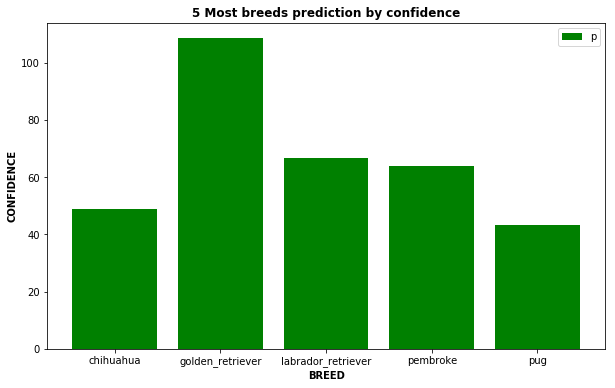

In [141]:
#plotting bar

from matplotlib import pyplot as plt

plt.figure(figsize=(10,6))

#define x and y values
x = conf_pred_dogs.keys()
y = conf_pred_dogs.values()

plt.bar(x,y, color='green')
    
plt.title('5 Most breeds prediction by confidence', fontweight='bold')
plt.ylabel('CONFIDENCE', fontweight='bold')
plt.xlabel('BREED', fontweight='bold')
plt.legend('pred', loc='upper right')

#let's save the plot
plt.savefig('breeds_pred_conf.png')

#displaying plot
plt.show()